(173, 100, 100, 3)
(186, 100, 100, 3)
(165, 100, 100, 3)
(170, 100, 100, 3)


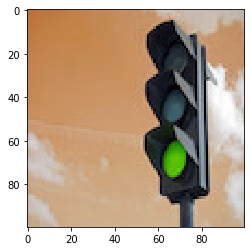

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
greendata = []
for i in range(1,10):
    x = 'green/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'green/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'green/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
         pass
greendata = np.array(greendata)

reddata = []
for i in range(1,10):
    x = 'red/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'red/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'red/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
         pass
reddata = np.array(reddata)

redcardata = []
for i in range(1,10):
    x = 'red_car/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'red_car/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'red_car/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
         pass
redcardata = np.array(redcardata)

greencardata = []
for i in range(1,10):
    x = 'green_car/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'green_car/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'green_car/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
         pass
greencardata = np.array(greencardata)
print(reddata.shape)
print(greendata.shape)
print(redcardata.shape)
print(greencardata.shape)

In [16]:
import numpy as np
def same_shuffle(arr1,arr2):
    size = arr2.size
    print(size)
    idxs = np.arange(size)
    np.random.shuffle(idxs)
    return arr1[idxs], arr2[idxs]

In [31]:
greenlist = list(greendata)
redlist = list(reddata)
greencarlist = list(greencardata)
redcarlist = list(redcardata)
datalist = greenlist*5+ redlist*5
# datalist = greenlist + redlist
data = np.array(datalist)

In [32]:
y_green = np.zeros(186*5)
y_red = np.zeros(173*5)+1
y_green_list = list(y_green)
y_red_list = list(y_red)
y_list = y_green_list + y_red_list
y = np.array(y_list)
print(data.shape)
data, y = same_shuffle(data, y)

(1795, 100, 100, 3)
1795


In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [34]:
data_test = data[1400:]
data = data[:1400]
y_test = y[1400:]
y = y[:1400]

In [35]:
# Change these values
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 16)        4624      
_________________________________________________________________
flatten_2 (Flatten)          (None, 7056)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7056)             

In [37]:
history = model.fit(data, y, epochs=15,validation_data=(data_test,y_test))

Train on 1400 samples, validate on 395 samples
Epoch 1/15
1400/1400 [==============================] - 11s 8ms/sample - loss: 0.6843 - accuracy: 0.5557 - val_loss: 0.5870 - val_accuracy: 0.6354
Epoch 2/15
1400/1400 [==============================] - 11s 8ms/sample - loss: 0.5832 - accuracy: 0.6864 - val_loss: 0.4380 - val_accuracy: 0.7544
Epoch 3/15
1400/1400 [==============================] - 11s 8ms/sample - loss: 0.4846 - accuracy: 0.7500 - val_loss: 0.4195 - val_accuracy: 0.7848
Epoch 4/15
1400/1400 [==============================] - 11s 8ms/sample - loss: 0.4988 - accuracy: 0.7743 - val_loss: 0.3612 - val_accuracy: 0.8304
Epoch 5/15
1400/1400 [==============================] - 11s 8ms/sample - loss: 0.4165 - accuracy: 0.7864 - val_loss: 0.4350 - val_accuracy: 0.7443
Epoch 6/15
1400/1400 [==============================] - 11s 8ms/sample - loss: 0.3549 - accuracy: 0.8343 - val_loss: 0.2845 - val_accuracy: 0.8582
Epoch 7/15
1400/1400 [==============================] - 11s 8ms/sample 

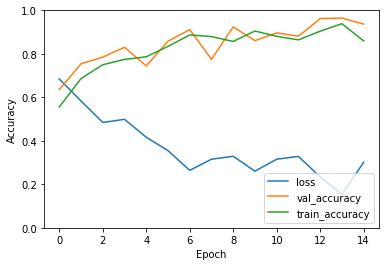

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [39]:
print(model.evaluate(data_test,y_test))

395/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [45]:
pred = model.predict(tf.cast(np.array([data[0],data[7]]),tf.float32))
k = []
for j in pred:
    k.append(j.argmax())
print("predicted: "+k)
print("real:y[0],y[7])

[0, 1]
0.0 1.0


In [ ]:
x = np.arange(100).reshape(10,10)

In [ ]:
import tensorflow.lite as tflite

In [ ]:
model.save('nn.h5')

In [ ]:
model2 = tf.keras.models.load_model('nn.h5')

In [ ]:
print(model2.predict(tf.cast(np.array([data[0],data[6]]),tf.float32)))
print(y[0],y[6])